## Downloading the FPAR and LAI images from GEE MODIS dataset
*************************************************************
**Date**: 15th Dec 2024

**Written by**: Priyanka N
*************************************************************
**MOD15A2H.061: Terra Leaf Area Index/FPAR 8-Day Global 500m**

The MOD15A2H V6.1 MODIS combined Leaf Area Index (LAI) and Fraction of Photosynthetically Active Radiation (FPAR) product is an 8-day composite dataset at 500m resolution. The algorithm chooses the "best" pixel available from all the acquisitions of the Terra sensor from within the 8-day period.

This data has been extracted for Uttarakhand state.

This data will be used in the model for predicting wildfire spread.

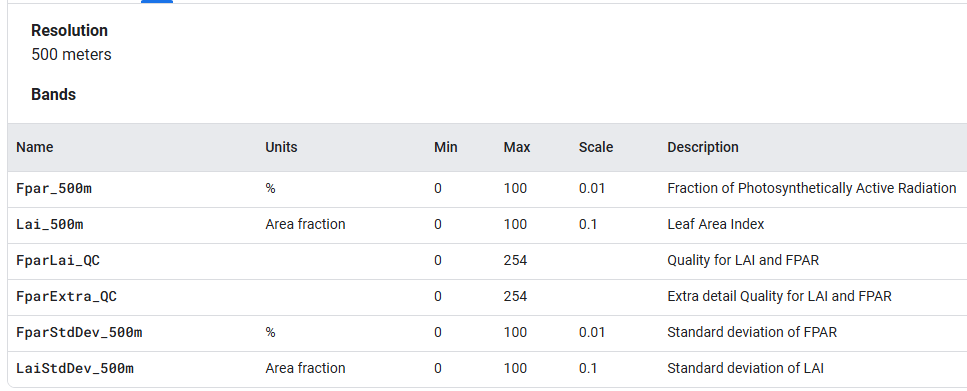

In [1]:
!pip install earthengine-api geemap pycrs --q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00


In [2]:
import ee
import geemap

In [3]:
ee.Authenticate()

In [4]:
ee.Initialize(project="ee-nprinka235")

In [5]:
# Load a shapefile using geemap
shapefile = '/content/drive/MyDrive/Colab Notebooks/Forest_fire_prediction/Uttarakhand/uttarakhand_WGS1984.shp'
roi = geemap.shp_to_ee(shapefile)

Period of download

In [6]:
start_date = '2024-01-01'
end_date = '2024-12-31'

In [21]:
fpar_lai_collection = ee.ImageCollection('MODIS/061/MOD15A2H')\
                        .filterDate(start_date, end_date)\
                        .filterBounds(roi)

There are 43 images in the year 2024.

In [8]:
fpar_lai_collection

In [ ]:
vis_params = {
  'min': 0,
  'max': 100,
  'palette': [
    'ffffff', 'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
    '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
    '012e01', '011d01', '011301'
  ],
};

Bands for FPAR and LAI and the scaling factor. MODIS data for FPAR and LAI is scaled, meaning raw pixel values need to be multiplied by a factor to get real-world values.

In [9]:
# Select bands
fpar_band = "Fpar_500m"
lai_band = "Lai_500m"
scale_fpar = 0.01
scale_lai = 0.1

Note: Below code is just for viewing the images on Map.

In [22]:
lai_image_collection = fpar_lai_collection.select(lai_band)
fpar_image_collection = fpar_lai_collection.select(fpar_band)

Selecting one image from the image collection.

In [ ]:
lai_image = fpar_lai_collection.select(lai_band).first()
fpar_image = fpar_lai_collection.select(fpar_band).first()

In [ ]:
Map = geemap.Map()
# Center the map on a specific location (optional)
Map.centerObject(roi, zoom=6)
Map.addLayer(lai_image.clip(roi), vis_params, 'Lai');
Map.addLayer(fpar_image.clip(roi), vis_params, 'Fpar');
Map.addLayer(roi, {}, 'ROI')

# Display the map
Map

Map(center=[30.15504600530337, 79.21019661576261], controls=(WidgetControl(options=['position', 'transparent_b…

Getting the images as a list and Calculating the total number of images in the colection.

In [ ]:
# Loop through each image in the collection
images_list = lai_image_collection.select(lai_band).toList(lai_image_collection.size())  # Get images as list
num_images = lai_image_collection.size().getInfo()  # Number of images

In [23]:
lai_image_scaled = lai_image_collection.map(
    lambda img: img.multiply(scale_lai).rename('scaled_lai_image')
)


In [24]:
fpar_image_scaled = fpar_image_collection.map(
    lambda img: img.multiply(scale_fpar).rename('scaled_fpar_image')
)

In [ ]:
images_list

In [ ]:
num_images

43

Note: Below code is for verifying the date variable which will be later used for downloading the images.

In [ ]:
images = fpar_lai_collection.select(lai_band).map(lambda img: img.multiply(0.1).rename('scaled_image'))

In [ ]:
image = ee.Image(images.first()).clip(roi)
date = image.get("system:index").getInfo()

In [ ]:
date

'2024_01_01'

Function for exporting the images in the collection to drive. Here we download the images for FPAR and LAI separately.

In [ ]:
# Function to export all images in a collection to Google Drive
def export_images_to_drive(image_collection, band_name, scale_factor, folder_name):
    images = image_collection.select(band_name).map(lambda img: img.multiply(scale_factor).rename('scaled_image'))
    images_list = images.toList(images.size())
    num_images = image_collection.size().getInfo()

    print(f"Starting export of {num_images} images for band '{band_name}' to Google Drive.")
    for i in range(num_images):
        image = ee.Image(images_list.get(i)).clip(roi)
        date = image.get('system:index').getInfo()
        task_name = f"{band_name}_{date}"

        # Export task to Google Drive
        task = ee.batch.Export.image.toDrive(
            image=image,
            description=task_name,
            folder=folder_name,
            fileNamePrefix=task_name,
            region=roi.geometry(),
            scale=500,  # Adjust scale as needed
            crs="EPSG:4326",
            maxPixels=1e13
        )
        task.start()
        print(f"Export task '{task_name}' started.")


In [ ]:
# Define Google Drive folder names
drive_folder_rasters = "MODIS_Raster_Exports"

In [ ]:
# Start export tasks
export_images_to_drive(fpar_lai_collection, fpar_band, scale_fpar, drive_folder_rasters)
export_images_to_drive(fpar_lai_collection, lai_band, scale_lai, drive_folder_rasters)


Starting export of 43 images for band 'Fpar_500m' to Google Drive.
Export task 'Fpar_500m_2024_01_01' started.
Export task 'Fpar_500m_2024_01_09' started.
Export task 'Fpar_500m_2024_01_17' started.
Export task 'Fpar_500m_2024_01_25' started.
Export task 'Fpar_500m_2024_02_02' started.
Export task 'Fpar_500m_2024_02_10' started.
Export task 'Fpar_500m_2024_02_18' started.
Export task 'Fpar_500m_2024_02_26' started.
Export task 'Fpar_500m_2024_03_05' started.
Export task 'Fpar_500m_2024_03_13' started.
Export task 'Fpar_500m_2024_03_21' started.
Export task 'Fpar_500m_2024_03_29' started.
Export task 'Fpar_500m_2024_04_06' started.
Export task 'Fpar_500m_2024_04_14' started.
Export task 'Fpar_500m_2024_04_22' started.
Export task 'Fpar_500m_2024_04_30' started.
Export task 'Fpar_500m_2024_05_08' started.
Export task 'Fpar_500m_2024_05_16' started.
Export task 'Fpar_500m_2024_05_24' started.
Export task 'Fpar_500m_2024_06_01' started.
Export task 'Fpar_500m_2024_06_09' started.
Export ta

## Viewing the raster images using Rasterio library.

In [28]:
! pip install rasterio --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 59.1 MB/s eta 0:00:00


Function to plot the TIF images.

In [30]:
import rasterio

# Open the TIFF file
def plot_tiff_image(file_path):
  with rasterio.open(file_path) as dataset:
      # Read metadata
      print("Metadata:", dataset.meta)

      # Read the data as a NumPy array
      data = dataset.read(1)  # Read the first band
      # Flatten the image data to a 1D vector

      print("Shape of the data:", data.shape)

      # Access geospatial attributes
      print("CRS:", dataset.crs)
      print("Transform:", dataset.transform)

      # Visualize the data (optional)
      import matplotlib.pyplot as plt
      plt.imshow(data, cmap='viridis')
      plt.title("TIFF Image")
      plt.colorbar()
      plt.show()


Plotting one of the downloaded FPAR image.

Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 775, 'height': 611, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.004491576420597608, 0.0, 77.56952478372068,
       0.0, -0.004491576420597608, 31.46349282628624)}
Shape of the data: (611, 775)
CRS: EPSG:4326
Transform: | 0.00, 0.00, 77.57|
| 0.00,-0.00, 31.46|
| 0.00, 0.00, 1.00|


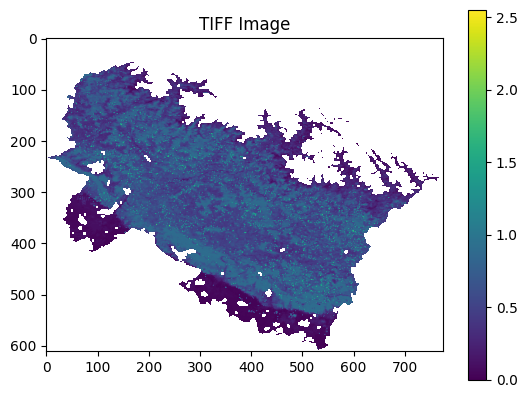

In [ ]:
plot_tiff_image("/content/drive/MyDrive/MODIS_Raster_Exports/Fpar_500m_2024_01_09.tif")

Plotting one of the downloaded LAI image.

Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 775, 'height': 611, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.004491576420597608, 0.0, 77.56952478372068,
       0.0, -0.004491576420597608, 31.46349282628624)}
Shape of the data: (611, 775)
CRS: EPSG:4326
Transform: | 0.00, 0.00, 77.57|
| 0.00,-0.00, 31.46|
| 0.00, 0.00, 1.00|


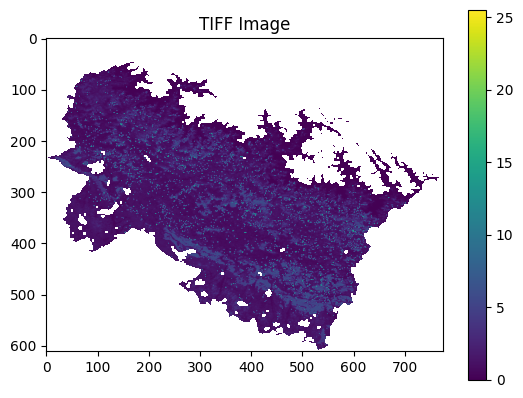

In [ ]:
plot_tiff_image("/content/drive/MyDrive/MODIS_Raster_Exports/Lai_500m_2024_03_05.tif")

Reading the image values.

In [31]:
import pandas as pd
# Read the .tif file
tif_file_path = "/content/drive/MyDrive/MODIS_Raster_Exports/Lai_500m_2024_03_05.tif"
with rasterio.open(tif_file_path) as src:
    # Read the first band
    data = src.read(1)  # Assuming single-band raster
    # Get the transform to calculate geographic coordinates
    transform = src.transform

# Convert raster values to a table
rows, cols = data.shape
values = []

for row in range(rows):
    for col in range(cols):
        # Get the raster value
        value = data[row, col]
        # Get the geographic coordinates (if needed)
        x, y = rasterio.transform.xy(transform, row, col, offset='center')
        # Append as a record
        values.append((row, col, x, y, value))

# Create a Pandas DataFrame
df = pd.DataFrame(values, columns=["Row", "Col", "Longitude", "Latitude", "Value"])

# Display the DataFrame
print(df.tail())  # Show the first few rows

        Row  Col  Longitude   Latitude  Value
473520  610  770  81.030284  28.721385    NaN
473521  610  771  81.034776  28.721385    NaN
473522  610  772  81.039268  28.721385    NaN
473523  610  773  81.043759  28.721385    NaN
473524  610  774  81.048251  28.721385    NaN


In [32]:
df.to_csv("Lai_500m_2024_03_05.csv",index=False)